## Explore feature-to-feature relationships in breast cancer dataset

* TODO check https://scikit-learn.org/dev/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

In [9]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import beyond_correlation as bc
#from beyond_correlation import discover
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
%load_ext watermark
%watermark -d -m -v -p numpy,matplotlib,sklearn -g

2019-11-02 

CPython 3.7.3
IPython 7.9.0

numpy 1.17.3
matplotlib 3.1.1
sklearn 0.21.3

compiler   : GCC 7.3.0
system     : Linux
release    : 5.2.6-050206-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 5d7759b8ad494988e1fdee8eb4dab48f01bd9802


In [4]:
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns = data.feature_names)
df_bc['target'] = data.target

classifier_overrides = set()
cols = list(df_bc.columns)
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
cols = ['texture error',
'smoothness error',
'symmetry error',
'mean smoothness',
'worst smoothness',
'mean symmetry',
'worst symmetry',
'mean fractal dimension',
'fractal dimension error',
'worst fractal dimension',
'concave points error',
'compactness error',
'concavity error',
'mean concavity',
'mean concave points',
'worst concave points',
'mean compactness',
'worst compactness',
'worst concavity',
'mean radius',
'mean area',
'worst perimeter',
'mean perimeter',
'worst radius',
'worst area',
'mean texture',
'worst texture',
'area error',
'radius error',
'perimeter error']

df = df_bc[cols]

## Data Exploration - Random Forests

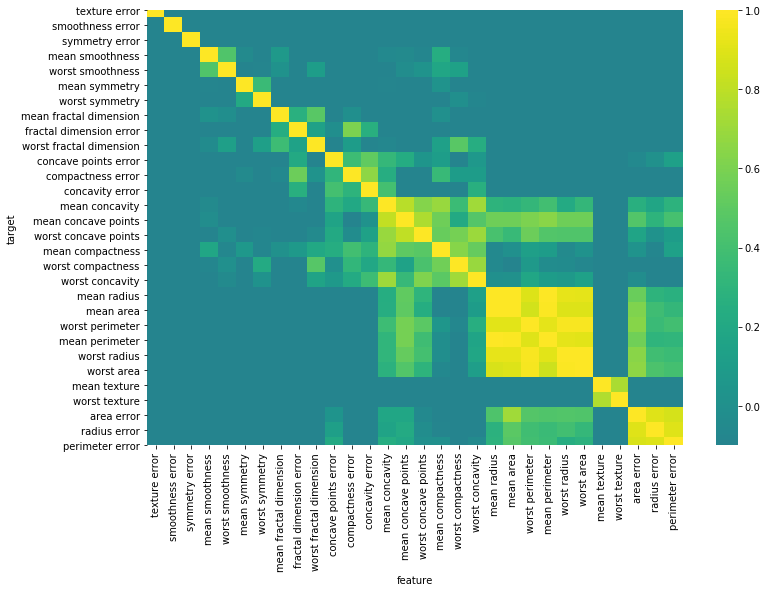

In [15]:
df_results_tmp = df_results.pivot(index='target', columns='feature', values='score')[cols].T[cols].T

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_results_tmp.fillna(1),
            annot=False, center=0, ax=ax, vmin=-0.1, vmax=1, cmap="viridis");

## Explore Correlation 

### Person (linear)

In [17]:
df_results = bc.discover(df_bc[cols[:10]], classifier_overrides, method='pearson')

df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", axis=1) \
.set_precision(2)

feature,fractal dimension error,mean fractal dimension,mean smoothness,mean symmetry,smoothness error,symmetry error,texture error,worst fractal dimension,worst smoothness,worst symmetry
target,,,,,,,,,,
fractal dimension error,1,0.69,0.28,0.33,0.43,0.37,0.28,0.59,0.17,0.11
mean fractal dimension,0.69,1,0.58,0.48,0.4,0.35,0.16,0.77,0.5,0.33
mean smoothness,0.28,0.58,1,0.56,0.33,0.2,0.068,0.5,0.81,0.39
mean symmetry,0.33,0.48,0.56,1,0.19,0.45,0.13,0.44,0.43,0.7
smoothness error,0.43,0.4,0.33,0.19,1,0.41,0.4,0.1,0.31,-0.11
symmetry error,0.37,0.35,0.2,0.45,0.41,1,0.41,0.078,-0.013,0.39
texture error,0.28,0.16,0.068,0.13,0.4,0.41,1,-0.046,-0.074,-0.13
worst fractal dimension,0.59,0.77,0.5,0.44,0.1,0.078,-0.046,1,0.62,0.54
worst smoothness,0.17,0.5,0.81,0.43,0.31,-0.013,-0.074,0.62,1,0.49


### Spearman (rank-based)

In [18]:
df_results = bc.discover(df_bc[cols[:10]], classifier_overrides, method='spearman')

df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", axis=1) \
.set_precision(2)

feature,fractal dimension error,mean fractal dimension,mean smoothness,mean symmetry,smoothness error,symmetry error,texture error,worst fractal dimension,worst smoothness,worst symmetry
target,,,,,,,,,,
fractal dimension error,1,0.68,0.41,0.4,0.46,0.38,0.31,0.71,0.31,0.17
mean fractal dimension,0.68,1,0.59,0.43,0.4,0.31,0.16,0.76,0.49,0.3
mean smoothness,0.41,0.59,1,0.54,0.34,0.15,0.091,0.51,0.8,0.39
mean symmetry,0.4,0.43,0.54,1,0.21,0.38,0.14,0.41,0.42,0.71
smoothness error,0.46,0.4,0.34,0.21,1,0.47,0.44,0.13,0.37,-0.067
symmetry error,0.38,0.31,0.15,0.38,0.47,1,0.39,0.011,-0.043,0.28
texture error,0.31,0.16,0.091,0.14,0.44,0.39,1,-0.048,-0.023,-0.12
worst fractal dimension,0.71,0.76,0.51,0.41,0.13,0.011,-0.048,1,0.61,0.49
worst smoothness,0.31,0.49,0.8,0.42,0.37,-0.043,-0.023,0.61,1,0.5
